# An Explanation of Isolation Forest 

## What is Isolation Forest?

* Isolation Forest is a learning algorithm used for anomaly/outlier detection.
* The algorithm is distance-based and attempts to isolate outliers by selecting a feature and repeatedly splitting the data between the minimum and maximum values of that feature.

In [1]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create data frame

data = {'x_value': [2, 1, 2, 2, 1, 1, 0, 2, 2, 3, 2, 0, 3, 1, 6],
        'y_value': [4, 1, 2, 1, 3, 2, 1, 3, 3, 2, 0, 2, 1, 0, 6]
       }

df = pd.DataFrame (data, columns = ['x_value', 'y_value'])

print (df)

    x_value  y_value
0         2        4
1         1        1
2         2        2
3         2        1
4         1        3
5         1        2
6         0        1
7         2        3
8         2        3
9         3        2
10        2        0
11        0        2
12        3        1
13        1        0
14        6        6


<AxesSubplot:xlabel='x_value', ylabel='y_value'>

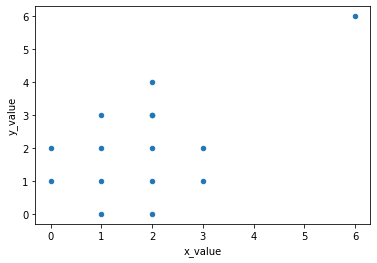

In [3]:
# create scatter plot of data for visualization

df.plot.scatter(x = 'x_value', y = 'y_value')

## How it Works

* Select an inputted feature and split the data at a value between the minimum and maximum of that feature.
* Repeatedly do this until isolating all features.
* This creates an isolation Tree.

<AxesSubplot:xlabel='x_value', ylabel='y_value'>

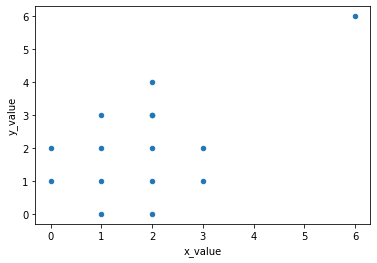

In [4]:
# create scatter plot of data for visualization

df.plot.scatter(x = 'x_value', y = 'y_value')

## Isolation Tree Visualization

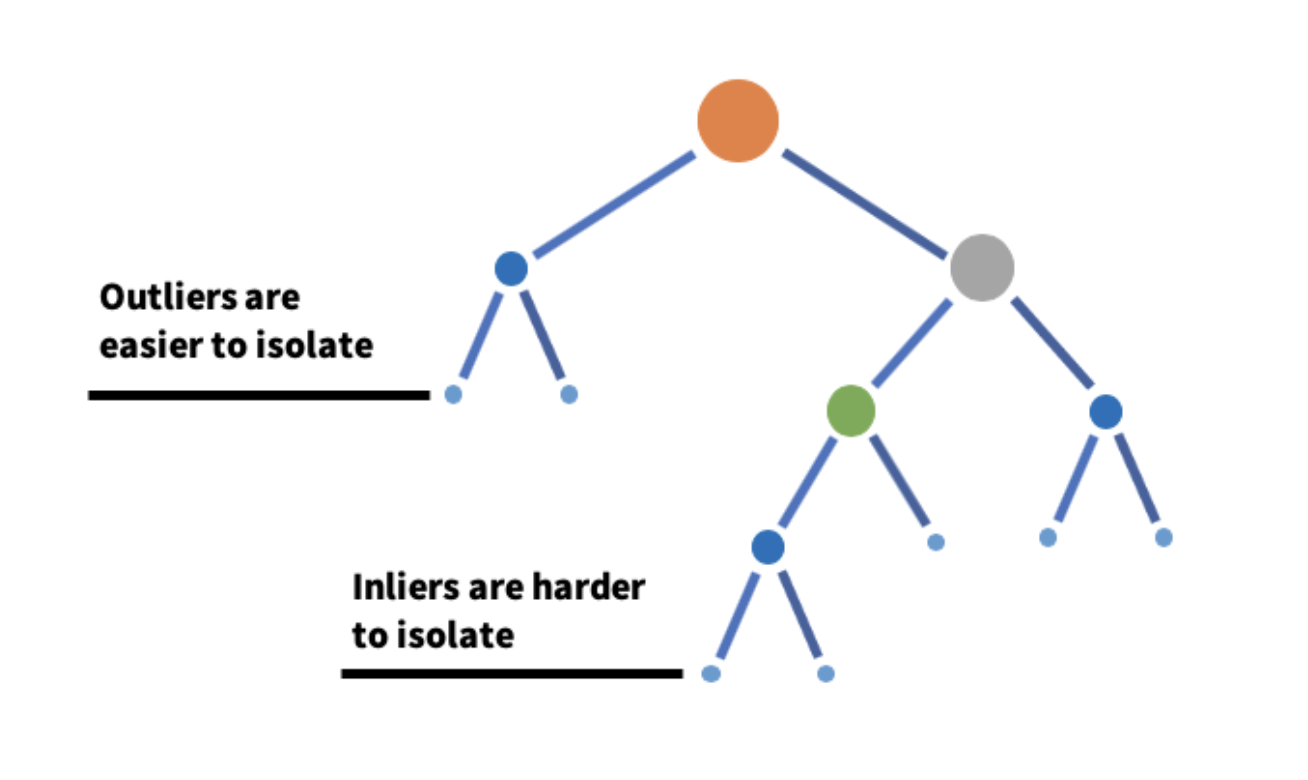

## Creating an Isolation Forest

* Repeat the process of creating an isolation tree with different ways of splitting the data.
* After creating mutliple Isolation Trees, you have an Isolation Forest.
* For each data point, put it through all the created tress and measure how many splits it takes on average to be isolated. The higher the average, the greater its "anomaly score" is.

In [5]:
# Train Model

model = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.07), max_features=1.0)
model.fit(df[['x_value', 'y_value']])

# Each point is given an anomaly score by the algorithm
# That score is then used to determine if a data point is an anomaly (-1) or is not an anomaly (1)

df['scores'] = model.decision_function(df[['x_value', 'y_value']])
df['anomaly'] = model.predict(df[['x_value', 'y_value']])
df.head(20)

,x_value,y_value,scores,anomaly
0,2,4,0.048324,1
1,1,1,0.089656,1
2,2,2,0.133744,1
3,2,1,0.116507,1
4,1,3,0.056952,1
5,1,2,0.105663,1
6,0,1,0.005052,1
7,2,3,0.125711,1
8,2,3,0.125711,1
9,3,2,0.025287,1


In [6]:
# Print ONLY anomalies

anomaly = df.loc[df['anomaly'] == -1]
anomaly_index = list(anomaly.index)
print(anomaly)

    x_value  y_value    scores  anomaly
14        6        6 -0.239303       -1


## Isolation Forest vs. Other Anomaly Detection Algorithms

* More effective and efficient, especially in large datasets
* Low, linear runtime complexity (especially useful for large datasets)
* Small memory requirement
* Greater ability to deal with high dimensional datasets
* Can be trained with or without anomalies in the training set

## Papers 

* Liu, Ting, and Zhou 2008: https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=4781136
* Liu, Ting, and Zhou 2009: https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/tkdd11.pdf